In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [25]:
class Perceptron(object):
    '''
    eta - Learning rate
    w_ - Weights after fitting
    errors_ - Number of misclassifications in every epoch
    '''
    def __init__(self, eta=0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        '''
        X: [n_samples, n_features] - Input
        y: [n_features] - Target values
        '''
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update!=0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0, 1, -1)
       

In [71]:
def plot_decision_regions(X, y, classifier, resolution=.01):
    
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    xx1_min, xx1_max = X[:,0].min()-1, X[:,0].max()+1
    xx2_min, xx2_max = X[:,1].min()-1, X[:,1].max()+1
    
    xx1,xx2 = np.meshgrid(np.arange(xx1_min,xx1_max, resolution),
                          np.arange(xx2_min,xx2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl,1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx],label=cl)


In [27]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)

In [28]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
y = df.iloc[:100, 4].values

In [30]:
y = np.where(y == "Iris-setosa", -1 ,1)

In [31]:
X = df.iloc[0:100, [0, 2]].values

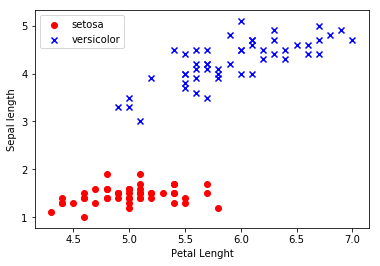

In [32]:
plt.scatter(X[:50,0], X[:50,1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:,0], X[50:,1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('Petal Lenght')
plt.ylabel('Sepal length')
plt.legend(loc='upper left')
plt.show()

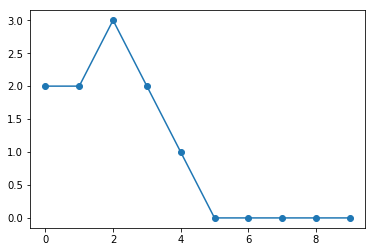

In [35]:
ppn = Perceptron(eta=0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(0,len(ppn.errors_)), ppn.errors_, marker='o')

4.3


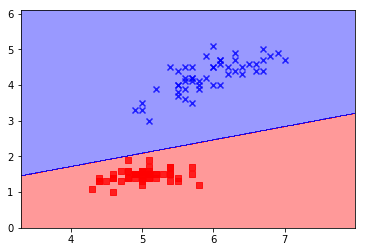

In [72]:
plot_decision_regions(X,y, classifier = ppn)
print(X[:,0].min())